Saving synthetic_hvac_energy_data.csv to synthetic_hvac_energy_data (1).csv
Linear Regression RMSE: 0.43093677305585915
XGBoost RMSE: 0.055416537256872185


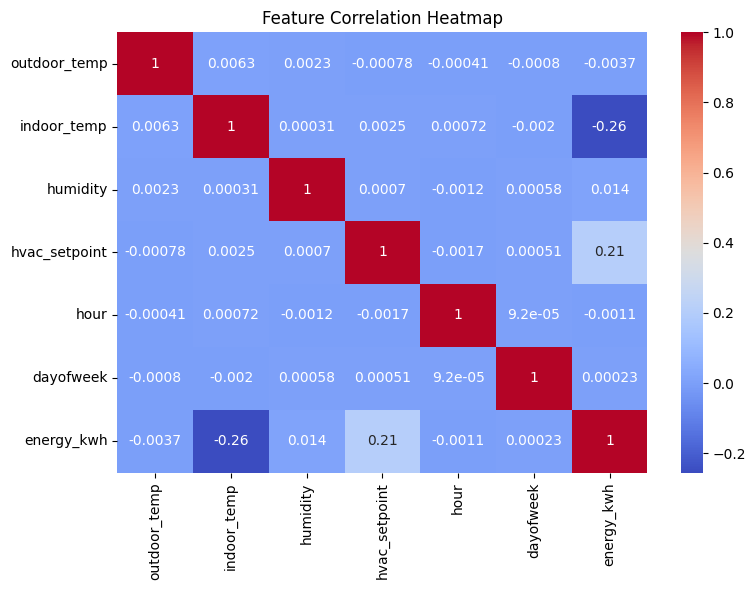

In [4]:
# HVAC Energy Consumption Prediction in Google Colab

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load data
df = pd.read_csv(next(iter(uploaded)))

# Convert timestamp and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Define features and target
features = ['outdoor_temp', 'indoor_temp', 'humidity', 'hvac_setpoint', 'hvac_mode', 'hour', 'dayofweek']
target = 'energy_kwh'
X = df[features]
y = df[target]

# Preprocessing
numeric_features = ['outdoor_temp', 'indoor_temp', 'humidity', 'hvac_setpoint', 'hour', 'dayofweek']
categorical_features = ['hvac_mode']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Linear Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Linear Regression
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)

# Train and evaluate XGBoost
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
